# Основные понятия машинного обучения

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
* https://contrib.scikit-learn.org/category_encoders/
* https://scikit-learn.org/stable/modules/model_evaluation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* http://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

## Задачи для совместного разбора

In [ ]:
import torch
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
upolad_file = files.upload()

Saving Walmart.csv to Walmart.csv


1\. Загрузите набор данных из файла `possum.csv` в виде `pd.DataFrame`. Решите задачу классификации по столбцу `sex`.

In [ ]:
dataset = "/content/possum.csv"
df = pd.read_csv(dataset)
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
# print(df.describe())
# print(df.info())

In [ ]:
# print(df.isnull().sum())

In [ ]:
df["age"] = df["age"].fillna(df["age"].mean())
df["footlgth"] = df["footlgth"].fillna(df["footlgth"].mean())
#df.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = df.drop(["sex", "site", "Pop", "case"], axis=1).values
y = df["sex"].values
y = le.fit_transform(y)

print(f"X shape: {X.shape} \ny shape: {y.shape} \nMale count {y.sum()}")

X shape: (104, 10) 
y shape: (104,) 
Male count 61


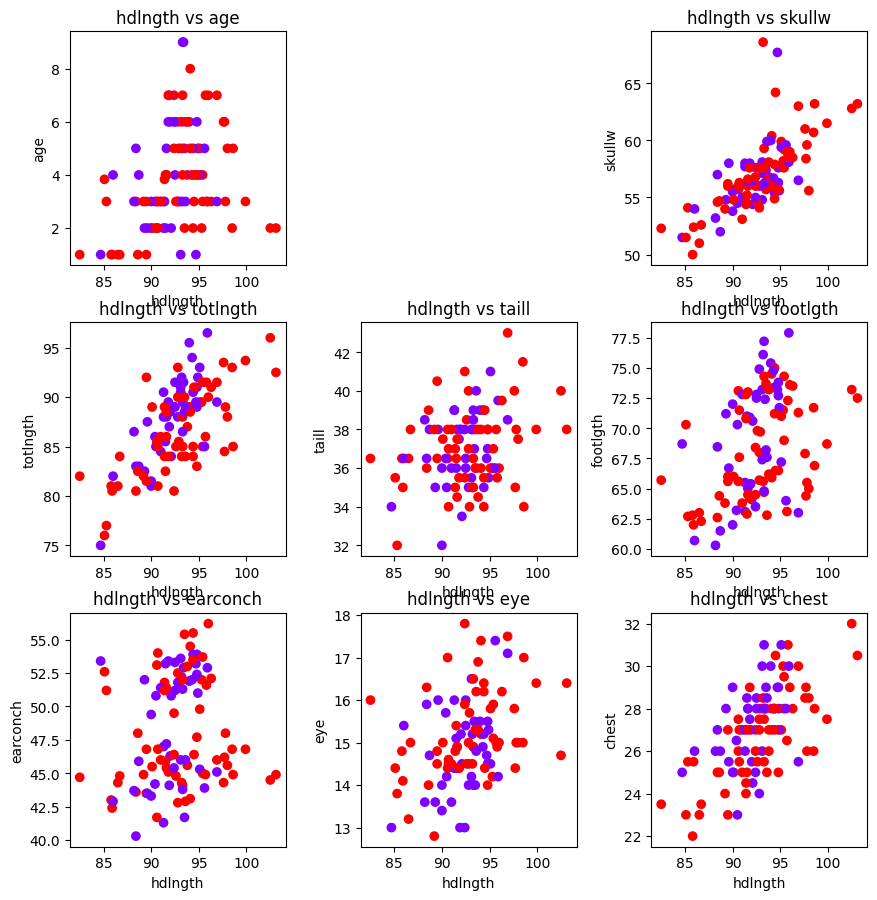

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
fig.tight_layout(pad=2.0)

for i, ax in enumerate(axes.flat):
    if i == 1:
      ax.set_visible(False)
      continue
    if i < 9:
        ax.scatter(X["hdlngth"], X.iloc[:, i], c=y, cmap="rainbow")
        ax.set_xlabel(X.columns[1])
        ax.set_ylabel(X.columns[i])
        ax.set_title(f'{X.columns[1]} vs {X.columns[i]}')

plt.show()


In [ ]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split

knn = neighbors.KNeighborsClassifier(n_neighbors=2, weights="uniform")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

acc = metrics.accuracy_score(y_test, pred)
print(f"actual {y_test} \npredicition: {pred} \naccuracy: {acc}")

a = 7
print(f"actual {y} \npredicited: {knn.predict(X)}")

actual [1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0] 
predicition: [0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1] 
accuracy: 0.6190476190476191
actual [1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0] 
predicited: [1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0
 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression

def min_recall_precision(est, X, y_true, sample_weight=None):
  y_pred = est.predict(X)
  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  return min(recall, precision)


grid = GridSearchCV(
        estimator=LogisticRegression(max_iter=1000),
        param_grid={"class_weight": [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
        scoring={"precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "min_both": min_recall_precision},
        refit="min_both",
        return_train_score=True,
        cv=10,
        n_jobs=-1
)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_both', return_train_score=True,
             scoring={'min_both': <function min_recall_precision at 0x7dfe60f2fb00>,
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [ ]:
#pd.DataFrame(grid.cv_results_)

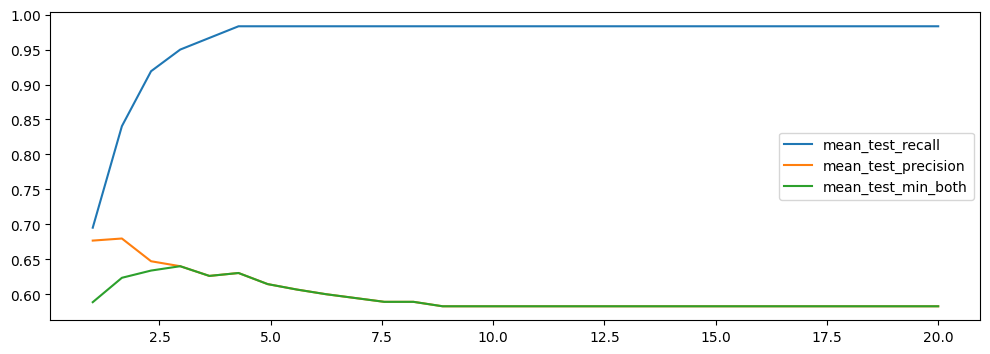

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ["mean_test_recall", "mean_test_precision", "mean_test_min_both"]:
  plt.plot([_[1] for _ in df["param_class_weight"]],
  df[score],
  label=score
  )
plt.legend();

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklego.meta import Thresholder
from sklearn.metrics import precision_score, recall_score, make_scorer, accuracy_score

pipe = Pipeline([
    ("model", Thresholder(LogisticRegression(solver="lbfgs", max_iter=1000), threshold=0.1))
])

mod = GridSearchCV(estimator=pipe,
                   param_grid={"model__threshold": np.linspace(0.1, 0.9, 50)},
                   scoring={"precision": make_scorer(precision_score, zero_division=1),
                            "recall": make_scorer(recall_score),
                            "accuracy": make_scorer(accuracy_score)},
                   refit="precision",
                   cv=5)
mod.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        Thresholder(model=LogisticRegression(max_iter=1000),
                                                    threshold=0.1))]),
             param_grid={'model__threshold': array([0.1       , 0.11632653, 0.13265306, 0.14897959, 0.16530612,
       0.18163265, 0.19795918, 0.21428571, 0.23061224, 0.24693878,
       0.26326531, 0.27959184, 0.29591837, 0.3122449 , 0.32857143,
       0.34489796, 0.36122449, 0.37755102...
       0.67142857, 0.6877551 , 0.70408163, 0.72040816, 0.73673469,
       0.75306122, 0.76938776, 0.78571429, 0.80204082, 0.81836735,
       0.83469388, 0.85102041, 0.86734694, 0.88367347, 0.9       ])},
             refit='precision',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict', zero_division=1),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [ ]:
#pd.DataFrame(mod.cv_results_)

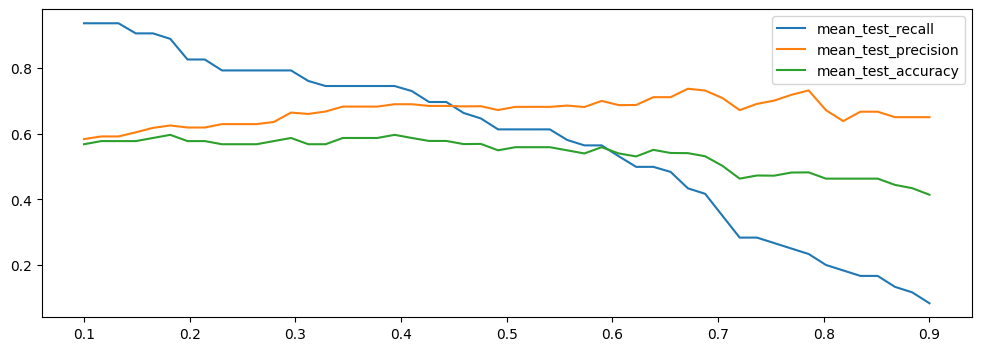

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
df = pd.DataFrame(mod.cv_results_)
for score in ["mean_test_recall", "mean_test_precision", "mean_test_accuracy"]:
  plt.plot(df["param_model__threshold"],
  df[score],
  label=score
  )
plt.legend();

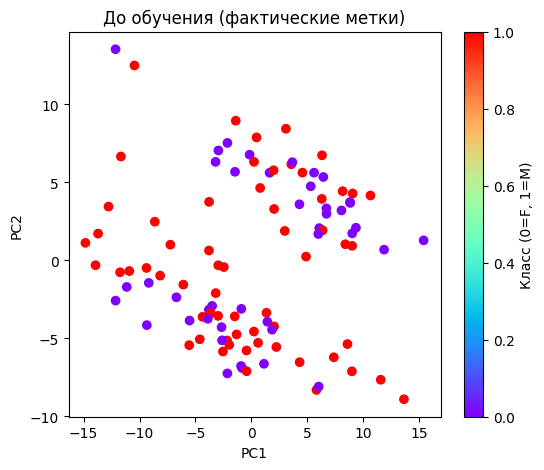

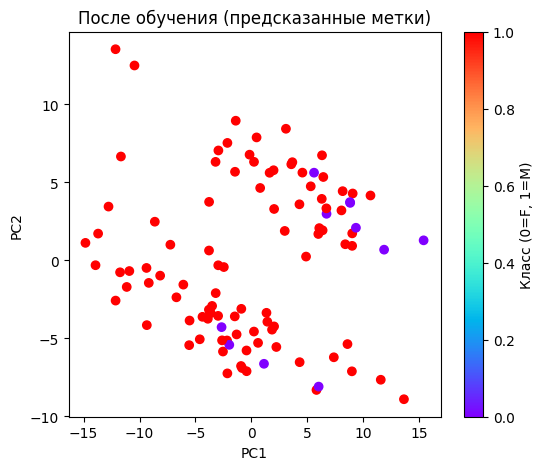

In [ ]:
from sklearn.decomposition import PCA

y_pred = grid.predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="rainbow")
plt.title("До обучения (фактические метки)")
plt.colorbar(label="Класс (0=F, 1=M)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap="rainbow")
plt.title("После обучения (предсказанные метки)")
plt.colorbar(label="Класс (0=F, 1=M)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

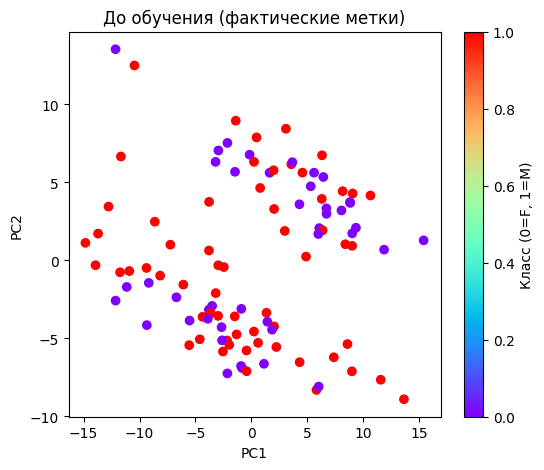

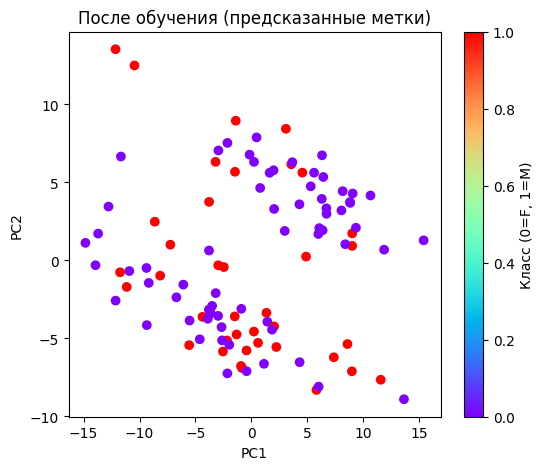

In [ ]:
from sklearn.decomposition import PCA


y_pred = mod.predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="rainbow")
plt.title("До обучения (фактические метки)")
plt.colorbar(label="Класс (0=F, 1=M)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap="rainbow")
plt.title("После обучения (предсказанные метки)")
plt.colorbar(label="Класс (0=F, 1=M)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


2\. Проверьте качество обучения модели с использованием перекрестной проверки

3\. Найдите оптимальные гиперпараметры модели, используя поиск по сетке.

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите набор данных из файла `Walmart.csv` в виде `pd.DataFrame`. Преобразуйте столбец `Temperature` в числовой. Преобразуйте столбец `IsHoliday` в числовой столбец, содержащий значения 0 и 1, предварительно проанализировав значения в этом столбце.

In [ ]:
df1 = pd.read_csv("Walmart.csv")
df1.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,05-02-2010,1643690.90,42.31°C,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,12-02-2010,1641957.44,38.51°C,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,Y
2,19-02-2010,1611968.17,39.93°C,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,N
3,26-02-2010,1409727.59,46.63°C,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,n
4,05-03-2010,1554806.68,46.5°C,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


In [ ]:
df1["Temperature"] = df1["Temperature"].str.replace("°C", "").astype(float)

In [ ]:
#df1.isnull().sum()

In [ ]:
df1["IsHoliday"].unique()


array(['0', 'Y', 'N', 'n', '-', 'no', 'No', 'y', 'Yes', '1', 'yes'],
      dtype=object)

In [ ]:
ones = ["y", "yes", "1"]
zeros = ["n", "no", "-", "0"]

df1["IsHoliday"] = df1["IsHoliday"].str.lower().map(
    lambda x: 1 if x in ones else (0 if x in zeros else None)
)

<p class="task" id="2"></p>

2\. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70 на 30 для решения задачи регрессии. Создайте несколько версий обучающей и тестовой выборки выбрав различные алгоритмы препроцессинга данных: кодирования нечисловой информации, масшабирования признаков и т.д. Обратите внимание, что все энкодеры должны настраиваться только на основе обучающей выборки, расчет статистик для масштабирования должен проводиться только на основе обучающей выборки и т.д.

In [ ]:
df1["Date"] = pd.to_datetime(df1["Date"], format="%d-%m-%Y")

In [ ]:
num_cols = ["Fuel_Price", "CPI", "Unemployment"]
cat_cols = ["IsHoliday", "StoreId"]

In [ ]:
X = df1.drop(["Weekly_Sales", "Date"], axis=1)
y = df1["Weekly_Sales"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train1 = X_train.copy()
X_test1 = X_test.copy()

le = LabelEncoder()
X_train1["StoreId"] = le.fit_transform(X_train1["StoreId"])
X_test1["StoreId"] = le.fit_transform(X_test1["StoreId"])

ss = StandardScaler()
X_train1[num_cols] = ss.fit_transform(X_train1[num_cols])
X_test1[num_cols] = ss.fit_transform(X_test1[num_cols])

# print(X_train1)
# print(X_test1)



In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

X_train2 = X_train.copy()
X_test2 = X_test.copy()

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
train_ohe = ohe.fit_transform(X_train2[["StoreId"]])
test_ohe = ohe.fit_transform(X_test2[["StoreId"]])

store_cols = [f"Store_{i}" for i in range(train_ohe.shape[1])]
X_train2 = X_train2.drop(columns=["StoreId"])
X_test2 = X_test2.drop(columns=["StoreId"])

X_train2 = pd.concat([X_train2.reset_index(drop=True), pd.DataFrame(train_ohe, columns=store_cols)], axis=1)
X_test2 = pd.concat([X_test2.reset_index(drop=True), pd.DataFrame(test_ohe, columns=store_cols)], axis=1)

mms = MinMaxScaler()
X_train2[num_cols] = mms.fit_transform(X_train2[num_cols])
X_test2[num_cols] = mms.fit_transform(X_test2[num_cols])

# print(X_train2)
# print(X_test2)

<p class="task" id="3"></p>

3\. Решите задачу предсказания столбца `Weekly_Sales` с использованием пакета `sklearn`. Продемонстрируйте несколько различных моделей и значения основных регрессионных метрик (MAE, MSE, RMSE, MAPE). Представьте результат в виде таблицы, где по строкам расположены различные комбинации модели и версий датасетов (дайте этим комбинациям названия и укажите их в качестве индекса), а по столбцам - метрики на обучающем и тестовом множестве (двойной индекс по колонкам). Отсортируйте таблицу по убыванию значений любой выбранной вами метрики на тестовом множестве.   

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def regression_metrics(y_true, y_pred):

  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-9))) * 100
  return {
      "MAE": mae,
      "MSE": mse,
      "RMSE": rmse,
      "MAPE": mape,
  }

models = [
    ("LinReg", LinearRegression()),
    ("RandForReg", RandomForestRegressor(random_state=42, n_estimators=50))
]

versions = [
    ("V1", (X_train1, y_train, X_test1, y_test)),
    ("V2", (X_train2, y_train, X_test2, y_test))
]

result_rows = []

for model_name, model in models:
  for version_name, (X_tr, y_tr, X_ts, y_ts) in versions:
    model.fit(X_tr, y_tr)
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_ts)

    train_metrics = regression_metrics(y_tr, y_pred_train)
    test_metrics = regression_metrics(y_ts, y_pred_test)

    row_name = f"{model_name} + {version_name}"
    row_data = {
        ("Train", "MAE"): train_metrics["MAE"],
        ("Train", "MSE"): train_metrics["MSE"],
        ("Train", "RMSE"): train_metrics["RMSE"],
        ("Train", "MAPE"): train_metrics["MAPE"],

        ("Test", "MAE"): test_metrics["MAE"],
        ("Test", "MSE"): test_metrics["MSE"],
        ("Test", "RMSE"): test_metrics["RMSE"],
        ("Test", "MAPE"): test_metrics["MAPE"],
    }

    row_df = pd.DataFrame([row_data], index=[row_name])
    result_rows.append(row_df)

final_results = pd.concat(result_rows)
final_results.sort_values(by=("Test", "MAPE"), ascending=False, inplace=True)

final_results


,"(Train, MAE)","(Train, MSE)","(Train, RMSE)","(Train, MAPE)","(Test, MAE)","(Test, MSE)","(Test, RMSE)","(Test, MAPE)"
LinReg + V1,469079.309775,3.121356e+11,558690.969028,66.085933,466356.609101,3.062370e+11,553386.857612,67.479607
LinReg + V2,91992.715474,2.581521e+10,160671.114869,8.866461,90932.454620,2.479062e+10,157450.366432,8.772311
RandForReg + V1,29169.108289,3.236506e+09,56890.299657,2.625279,81950.057891,2.358213e+10,153564.756446,7.342087
RandForReg + V2,28866.206664,3.277003e+09,57245.116223,2.571758,78430.601694,2.306222e+10,151862.507161,6.931176


<p class="task" id="4"></p>

4\. Повторите решение задачи 3, используя перекрестную проверку для оценки качества модели на обучающем множестве. При представлении результата в виде таблицы значения метрик указывайте в виде строки "среднее±ст.откл."

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_validate


def rmse_func(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape_func(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/(y_true + 1e-9))) * 100

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
rmse_scorer = make_scorer(rmse_func, greater_is_better=False)
mape_scorer = make_scorer(mape_func, greater_is_better=False)

scoring = {
    'MAE': mae_scorer,
    'MSE': mse_scorer,
    'RMSE': rmse_scorer,
    'MAPE': mape_scorer,
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

result_rows = []

for model_name, model in models:
  for version_name, (X_tr, y_tr, X_ts, y_ts) in versions:

      cv_res = cross_validate(
          estimator=model,
          X=X_tr,
          y=y_tr,
          cv=cv,
          scoring=scoring,
          return_estimator=False
      )

      row_data = {}

      for metric in scoring:
          arr = cv_res[f"test_{metric}"]

          mean_val = -np.mean(arr)
          std_val  = -np.std(arr)

          row_data[(f"{metric}_mean")] = mean_val
          row_data[(f"{metric}_std" )] = std_val

      model.fit(X_tr, y_tr)
      y_pred_test = model.predict(X_ts)

      test_mae  = mean_absolute_error(y_ts, y_pred_test)
      test_mse  = mean_squared_error(y_ts, y_pred_test)
      test_rmse = rmse_func(y_ts, y_pred_test)
      test_mape = mape_func(y_ts, y_pred_test)

      row_data["Test_MAE"]  = test_mae
      row_data["Test_MSE"]  = test_mse
      row_data["Test_RMSE"] = test_rmse
      row_data["Test_MAPE"] = test_mape

      idx_name = f"{model_name} + {version_name}"
      row_df = pd.DataFrame([row_data], index=[idx_name])
      result_rows.append(row_df)

final_results_cv = pd.concat(result_rows)

final_results_cv.sort_values(by="Test_MAPE", ascending=False, inplace=True)

display_results = final_results_cv.copy()

for metric in ["MAE","MSE","RMSE","MAPE"]:

  mean_col = f"{metric}_mean"
  std_col  = f"{metric}_std"

  display_results[f"Train_{metric}"] = (
      final_results_cv.apply(lambda row:
          f"{row[mean_col]:.2f}±{row[std_col]:.2f}",
          axis=1
      )
  )

  display_results.drop(columns=[mean_col, std_col], inplace=True)


for metric in ["MAE","MSE","RMSE","MAPE"]:
  val_col = f"Test_{metric}"
  display_results[val_col] = (
      display_results[val_col]
      .apply(lambda v: f"{v:.2f}±0.00")
  )

display_results


,Test_MAE,Test_MSE,Test_RMSE,Test_MAPE,Train_MAE,Train_MSE,Train_RMSE,Train_MAPE
LinReg + V1,466356.61±0.00,306237014178.09±0.00,553386.86±0.00,67.48±0.00,470259.32±-9978.10,313938719860.46±-12721306705.50,560187.78±-11329.90,66.28±-3.12
LinReg + V2,90932.45±0.00,24790617889.69±0.00,157450.37±0.00,8.77±0.00,93118.05±-3641.50,26408383116.62±-2968390446.27,162247.99±-9163.69,8.98±-0.16
RandForReg + V1,81950.06±0.00,23582134422.47±0.00,153564.76±0.00,7.34±0.00,80245.15±-4183.85,23907991291.16±-2892760669.31,154344.04±-9268.76,7.21±-0.21
RandForReg + V2,78430.60±0.00,23062221081.30±0.00,151862.51±0.00,6.93±0.00,79519.65±-4102.86,24167265648.73±-2982859999.40,155159.26±-9636.95,7.05±-0.21


<p class="task" id="5"></p>

5\. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70 на 30 с сохранением распределения столбца `IsHoliday` для решения задачи классификации. Создайте несколько версий обучающей и тестовой выборки выбрав различные алгоритмы препроцессинга данных: кодирования нечисловой информации, масшабирования признаков и т.д. Обратите внимание, что все энкодеры должны настраиваться только на основе обучающей выборки, расчет статистик для масштабирования должен проводиться только на основе обучающей выборки и т.д.

In [ ]:
df1 = df1.drop(["Date"], axis=1)

In [ ]:
y = df1["IsHoliday"]
X = df1.drop(["IsHoliday"], axis=1)

In [ ]:
num_cols = ["Weekly_Sales", "Fuel_Price", "CPI", "Unemployment", "Temperature"]
cat_cols = ["IsHoliday", "StoreId"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train1 = X_train.copy()
X_test1 = X_test.copy()

le = LabelEncoder()
X_train1["StoreId"] = le.fit_transform(X_train1["StoreId"])
X_test1["StoreId"] = le.fit_transform(X_test1["StoreId"])

ss = StandardScaler()
X_train1[num_cols] = ss.fit_transform(X_train1[num_cols])
X_test1[num_cols] = ss.fit_transform(X_test1[num_cols])

# print(X_train1)
# print(X_test1)



In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

X_train2 = X_train.copy()
X_test2 = X_test.copy()

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_ohe = ohe.fit_transform(X_train2[["StoreId"]])
X_test_ohe = ohe.transform(X_test2[["StoreId"]])

ohe_feature_names = ohe.get_feature_names_out(["StoreId"])

X_train2 = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=X_train2.index)
X_test2 = pd.DataFrame(X_test_ohe, columns=ohe_feature_names, index=X_test2.index)

X_train2 = pd.concat([X_train.drop(columns=["StoreId"]), X_train2], axis=1)
X_test2 = pd.concat([X_test.drop(columns=["StoreId"]), X_test2], axis=1)

mms = MinMaxScaler()
X_train2[num_cols] = mms.fit_transform(X_train2[num_cols])
X_test2[num_cols] = mms.fit_transform(X_test2[num_cols])

# print(X_train2)
# print(X_test2)
# print(X_train2.head())
#print(X_test2)

<p class="task" id="6"></p>

6\. Решите задачу предсказания столбца `IsHoliday` с использованием пакета `sklearn`. Продемонстрируйте несколько различных моделей и значения основных метрик классификации (Accuracy, Precision, Recall, F1, AUC ROC). Представьте результат в виде таблицы, где по строкам расположены различные комбинации модели и версий датасетов (дайте этим комбинациям названия и укажите их в качестве индекса), а по столбцам - метрики на обучающем и тестовом множестве (двойной индекс по колонкам).  Отсортируйте таблицу по убыванию значений любой выбранной вами метрики на тестовом множестве.     

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def classification_metrics(y_true, y_pred):

  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average="weighted", zero_division=1)
  recall = recall_score(y_true, y_pred, average="weighted")
  f1 = f1_score(y_true, y_pred, average="weighted")
  roc_auc = roc_auc_score(y_true, y_pred, average="weighted")
  return {
      "Accuracy": acc,
      "Precision": prec,
      "Recall": recall,
      "F1": f1,
      "ROC_AUC": roc_auc
  }

models = [
    ("LogReg", LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver="sag")),
    ("KNN", KNeighborsClassifier(n_neighbors=3))
]

versions = [
    ("V1", (X_train1, y_train, X_test1, y_test)),
    ("V2", (X_train2, y_train, X_test2, y_test))
]


result_rows = []

for model_name, model in models:
  for version_name, (X_tr, y_tr, X_ts, y_ts) in versions:
    model.fit(X_tr, y_tr)
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_ts)

    train_metrics = classification_metrics(y_tr, y_pred_train)
    test_metrics = classification_metrics(y_ts, y_pred_test)

    row_name = f"{model_name} + {version_name}"
    row_data = {
        ("Train", "Accuracy"): train_metrics["Accuracy"],
        ("Train", "Precision"): train_metrics["Precision"],
        ("Train", "Recall"): train_metrics["Recall"],
        ("Train", "F1"): train_metrics["F1"],
        ("Train", "ROC_AUC"): train_metrics["ROC_AUC"],

        ("Test", "Accuracy"): test_metrics["Accuracy"],
        ("Test", "Precision"): test_metrics["Precision"],
        ("Test", "Recall"): test_metrics["Recall"],
        ("Test", "F1"): test_metrics["F1"],
        ("Test", "ROC_AUC"): test_metrics["ROC_AUC"],

    }

    row_df = pd.DataFrame([row_data], index=[row_name])
    result_rows.append(row_df)

final_results = pd.concat(result_rows)
final_results.sort_values(by=("Test", "F1"), ascending=False, inplace=True)

final_results

,"(Train, Accuracy)","(Train, Precision)","(Train, Recall)","(Train, F1)","(Train, ROC_AUC)","(Test, Accuracy)","(Test, Precision)","(Test, Recall)","(Test, F1)","(Test, ROC_AUC)"
LogReg + V1,0.926954,0.932290,0.926954,0.891815,0.500000,0.937338,0.941265,0.937338,0.907021,0.500000
LogReg + V2,0.926954,0.932290,0.926954,0.891815,0.500000,0.937338,0.941265,0.937338,0.907021,0.500000
KNN + V2,0.927620,0.902355,0.927620,0.898910,0.524159,0.932160,0.878297,0.932160,0.904427,0.497238
KNN + V1,0.926288,0.895056,0.926288,0.897413,0.520641,0.925427,0.877895,0.925427,0.901035,0.493646


<p class="task" id="7"></p>

7\. Повторите задачу 6, используя поиск по сетке гиперпараметров для улучшения метрик моделей. При представлении результата в виде таблицы значения в столбце с названием модели укажите наилучшие гиперпараметры в виде "LogisticRegression(C=1, class_weight=None)"

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

param_grid_lr = {
    "C": [0.01, 0.1, 1, 10, 100],
    "class_weight": [{0: 1, 1: v} for v in np.linspace(1, 20, 30)],
}


param_grid_knn = {
    "n_neighbors": range(1, 7),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

models_param_grid = [
    ("LogReg", LogisticRegression(max_iter=1000), param_grid_lr),
    ("KNN", KNeighborsClassifier(), param_grid_knn)
]

best_results = []

for model_name, model, param_grid in models_param_grid:
    for version_name, (X_tr, y_tr, X_ts, y_ts) in versions:
        grid_search = GridSearchCV(
            model, param_grid,
            scoring={
                "precision": make_scorer(precision_score),
                "recall": make_scorer(recall_score),
                "accuracy": make_scorer(accuracy_score),
                "f1": make_scorer(f1_score),
                "ROC_AUC": make_scorer(roc_auc_score)
            },
            refit="f1",
            return_train_score=True,
            cv=5,
            n_jobs=-1
        )
        grid_search.fit(X_tr, y_tr)

        best_model = grid_search.best_estimator_
        best_params = best_model.get_params()
        best_params_str = f"{model_name}({', '.join([f'{k}={v}' for k, v in best_params.items() if k in param_grid])})"

        y_pred_train = best_model.predict(X_tr)
        y_pred_test = best_model.predict(X_ts)

        train_metrics = classification_metrics(y_tr, y_pred_train)
        test_metrics = classification_metrics(y_ts, y_pred_test)

        row_name = f"{best_params_str} + {version_name} (Tuned)"
        row_data = {
            ("Train", "Accuracy"): train_metrics["Accuracy"],
            ("Train", "Precision"): train_metrics["Precision"],
            ("Train", "Recall"): train_metrics["Recall"],
            ("Train", "F1"): train_metrics["F1"],
            ("Train", "ROC_AUC"): train_metrics["ROC_AUC"],

            ("Test", "Accuracy"): test_metrics["Accuracy"],
            ("Test", "Precision"): test_metrics["Precision"],
            ("Test", "Recall"): test_metrics["Recall"],
            ("Test", "F1"): test_metrics["F1"],
            ("Test", "ROC_AUC"): test_metrics["ROC_AUC"],
        }

        row_df = pd.DataFrame([row_data], index=[row_name])
        best_results.append(row_df)

final_tuned_results = pd.concat(best_results)
final_tuned_results.sort_values(by=("Test", "Recall"), ascending=False, inplace=True)

final_tuned_results


,"(Train, Accuracy)","(Train, Precision)","(Train, Recall)","(Train, F1)","(Train, ROC_AUC)","(Test, Accuracy)","(Test, Precision)","(Test, Recall)","(Test, F1)","(Test, ROC_AUC)"
"KNN(metric=euclidean, n_neighbors=1, weights=uniform) + V2 (Tuned)",1.000000,1.000000,1.000000,1.000000,1.000000,0.884516,0.875327,0.884516,0.879898,0.471823
"KNN(metric=euclidean, n_neighbors=1, weights=uniform) + V1 (Tuned)",1.000000,1.000000,1.000000,1.000000,1.000000,0.873641,0.876494,0.873641,0.875064,0.473734
"LogReg(C=10, class_weight={0: 1, 1: np.float64(7.551724137931034)}) + V2 (Tuned)",0.843028,0.908373,0.843028,0.869141,0.708130,0.846712,0.910527,0.846712,0.873672,0.656025
"LogReg(C=0.1, class_weight={0: 1, 1: np.float64(7.551724137931034)}) + V1 (Tuned)",0.830151,0.889881,0.830151,0.855967,0.618584,0.829104,0.901782,0.829104,0.860530,0.608073


<p class="task" id="8"></p>

8\. Постройте ROC-кривые для всех обученных в задаче 7 моделей. Изобразите их на одной плоскости, добавьте подписи осей и легенду.

In [ ]:
best_model.predict_proba(X_ts)[:, 1]

array([0. , 0.2, 0.2, ..., 0.2, 0. , 0. ])

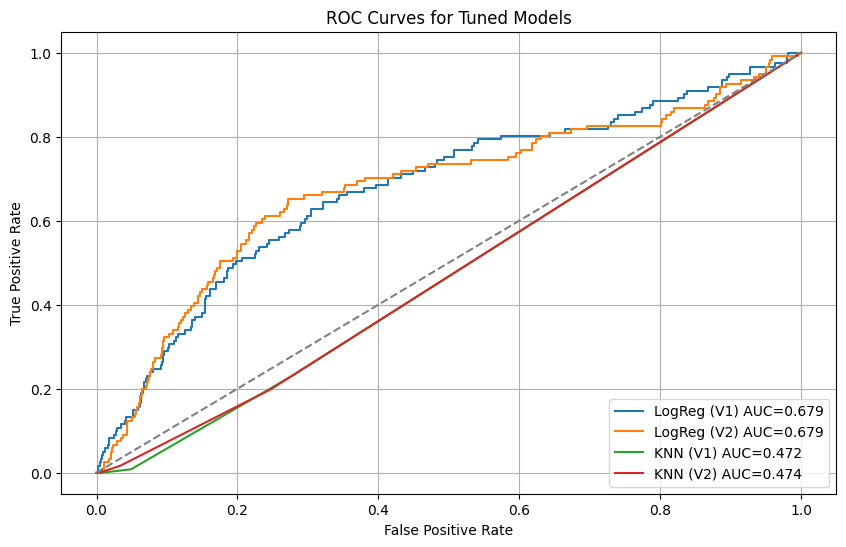

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for model_name, model, param_grid in models_param_grid:
    for version_name, (X_tr, y_tr, X_ts, y_ts) in versions:
        best_model = model.fit(X_tr, y_tr)

        y_scores = best_model.predict_proba(X_ts)[:, 1]

        fpr, tpr, _ = roc_curve(y_ts, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{model_name} ({version_name}) AUC={roc_auc:.3f}")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Tuned Models")
plt.legend(loc="lower right")
plt.grid()

plt.show()


<p class="task" id="9"></p>

9\. Используя любую из обученных моделей, сделайте предсказания столбца `IsHoliday` для тестового множества и сохраните результат в виде csv файла следующего вида:

```
id,isHoliday
1,0
2,1
...
```

In [ ]:
import pandas as pd

best_overall_model = final_tuned_results.index[0].split(" + ")[0]
selected_model = None

for model_name, model, param_grid in models_param_grid:
    if model_name in best_overall_model:
        selected_model = model.fit(X_train1, y_train)
        break

test_predictions = selected_model.predict(X_test1)

submission_df = pd.DataFrame({
    "Id": range(1, len(test_predictions) + 1),
    "IsHoliday": test_predictions
})

submission_filename = "holiday_predictions.csv"
submission_df.to_csv(submission_filename, index=False)

print(f"Predictions saved as {submission_filename}")


Predictions saved as holiday_predictions.csv


In [ ]:
pd.read_csv("holiday_predictions.csv").head()

,Id,IsHoliday
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## Обратная связь
- [ ] Хочу получить обратную связь по решению